In [3]:
import numpy as np
import scipy
from scipy import optimize
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.interpolate import interp1d

In [4]:
HI_M74 = pd.read_csv('M74.csv')

x = HI_M74.iloc[:, 0]
y = HI_M74.iloc[:, 1]
interp_linear = interp1d(x, y, kind='linear')
x_new_M74 = np.linspace(np.min(x), np.max(x),1000) 
y_new_M74 = interp_linear(x_new_M74)

In [235]:
R_25 = 9.916669921623116
x_new_M74_kpc = R_25 * x_new_M74

index = (x_new_M74_kpc >= 20) & (x_new_M74_kpc <= 50)

def exponential(x,C,R):
            
    return C*np.exp(-x/R)

yfit, _ = scipy.optimize.curve_fit(exponential,x_new_M74_kpc[index],10**y_new_M74[index],p0=[1e19,20])

In [236]:
print('Scale Length =', yfit[1], 'kpc')

Scale Length = 6.2810607789334245 kpc


[]

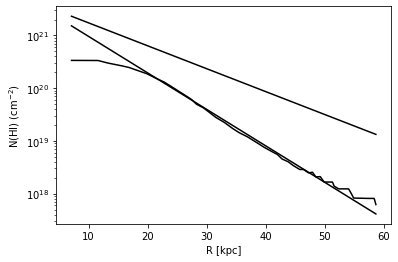

In [240]:
plt.plot(x_new_M74_kpc,10**y_new_M74,color='black',ls='-',label=r'NGC 628')
plt.plot(x_new_M74_kpc,exponential(x_new_M74_kpc,yfit[0],yfit[1]),color='black',ls='-',label=r'NGC 628')
plt.plot(x_new_M74_kpc,exponential(x_new_M74_kpc,yfit[0],10),color='black',ls='-',label=r'NGC 628')
plt.yscale('log')
plt.xlabel('R [kpc]')
plt.ylabel(r'N(HI) (cm$^{-2}$)')
plt.plot()

In [5]:
zheight = np.arange(0,4250,250)

In [213]:
n0 = 1.5

def function_total(R,z):
    
    return n0*np.exp((R-1100000)/6281)*np.exp(-np.abs(z)/500)

In [214]:
def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

In [215]:
x = np.arange(1000000,1100000,10)

constant_value = []

for i in zheight:
    
    constant = function_total(x,i)[0]
    
    constant_value.append(np.log10(constant))

In [216]:
x = np.arange(1000000,1100000,10)

alpha_value = []

for i, z in enumerate(zheight):
        
    y = function_total(x,z)
    yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[450])
    
    alpha_value.append(yfit[0])

[]

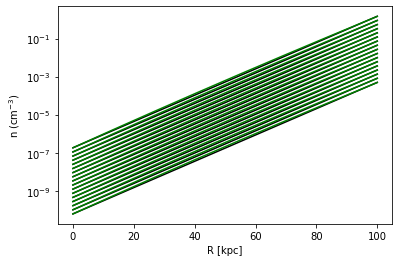

In [217]:
x = np.arange(1000000,1100000,1)

for i in range(len(zheight)):    

    plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
    plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

plt.yscale('log')
plt.xlabel('R [kpc]')
plt.ylabel(r'n (cm$^{-3}$)')

plt.plot()

## __Scale Length = 6.281 kpc:__

In [241]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/6281)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

In [242]:
constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

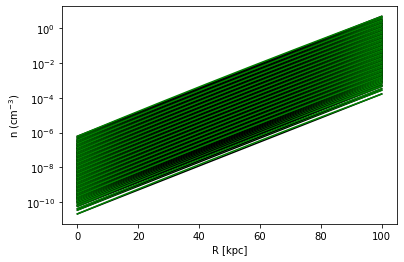

In [243]:
for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [244]:
np.savetxt('Rs_6_constant.txt',constant_value_all)
np.savetxt('Rs_6_alpha.txt',alpha_value_all)

## __Scale Length = 10.0 kpc:__

In [245]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/10000)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

In [246]:
constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

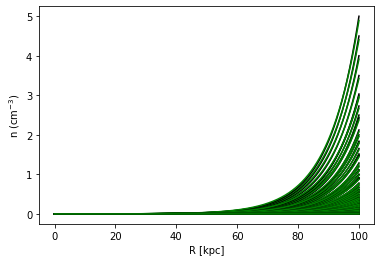

In [249]:
for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [248]:
np.savetxt('Rs_10_constant.txt',constant_value_all)
np.savetxt('Rs_10_alpha.txt',alpha_value_all)

## __Scale Length = 10.0 kpc, low n0:__

In [4]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/10000)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

In [9]:
constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.01,0.05,0.1]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

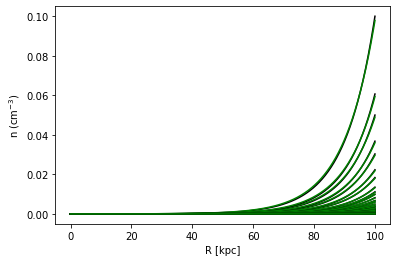

In [10]:
for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [11]:
np.savetxt('Rs_10_constant_low_nH.txt',constant_value_all)
np.savetxt('Rs_10_alpha_low_nH.txt',alpha_value_all)

## __Scale Length = 10.0 kpc, moderate n0:__

In [1]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/10000)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

In [6]:
constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.15,0.25,0.35]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

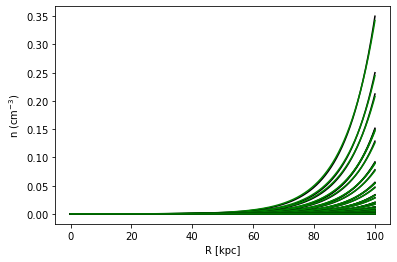

In [7]:
for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [8]:
np.savetxt('Rs_10_constant_moderate_nH.txt',constant_value_all)
np.savetxt('Rs_10_alpha_moderate_nH.txt',alpha_value_all)

## __Scale Length = 13.0 kpc, moderate n0:__

In [10]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/13000)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

In [12]:
constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.1,0.15,0.25,0.35]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

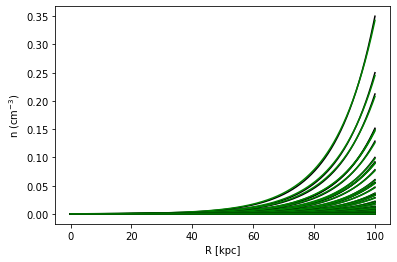

In [13]:
for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [14]:
np.savetxt('Rs_13_constant_moderate_nH.txt',constant_value_all)
np.savetxt('Rs_13_alpha_moderate_nH.txt',alpha_value_all)

## __Scale Length = 10.5 kpc, n0 = 0.1:__

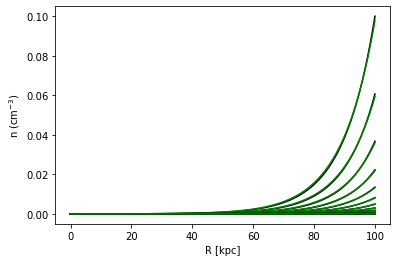

In [29]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/10500)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.1]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [30]:
np.savetxt('Rs_105_constant_01_nH.txt',constant_value_all)
np.savetxt('Rs_105_alpha_01_nH.txt',alpha_value_all)

## __Scale Length = 11 kpc, n0 = 0.1:__

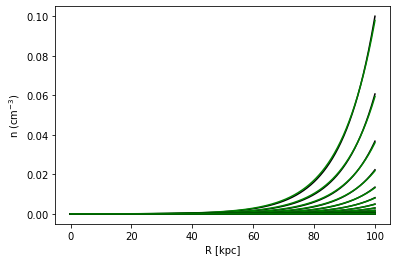

In [19]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/11000)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.1]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [20]:
np.savetxt('Rs_11_constant_01_nH.txt',constant_value_all)
np.savetxt('Rs_11_alpha_01_nH.txt',alpha_value_all)

## __Scale Length = 11.5 kpc, n0 = 0.1:__

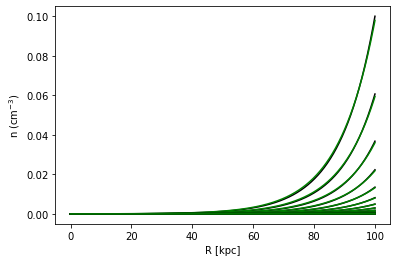

In [37]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/11500)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.1]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [38]:
np.savetxt('Rs_115_constant_01_nH.txt',constant_value_all)
np.savetxt('Rs_115_alpha_01_nH.txt',alpha_value_all)

## __Scale Length = 12.0 kpc, n0 = 0.1:__

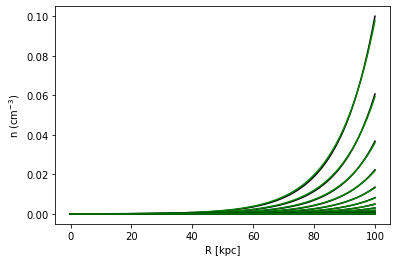

In [39]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/12000)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.1]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [40]:
np.savetxt('Rs_12_constant_01_nH.txt',constant_value_all)
np.savetxt('Rs_12_alpha_01_nH.txt',alpha_value_all)

## __Scale Length = 12.5 kpc, n0 = 0.1:__

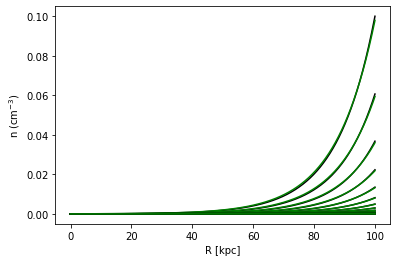

In [41]:
def function_total(R,z):
    
    return n0*np.exp((R-1100000)/12500)*np.exp(-np.abs(z)/500)

def fit_function2(x,alpha):
            
    return 10**(constant_value[i])*(x/1000000)**alpha

constant_value_all = [] 
alpha_value_all = []

x = np.arange(1000000,1100000,10)

n0_all = [0.1]

for n0 in n0_all:

    constant_value = []
    for i in zheight:

        constant = function_total(x,i)[0]
        constant_value.append(np.log10(constant))

    alpha_value = []
    for i, z in enumerate(zheight):

        y = function_total(x,z)
        yfit, _ = scipy.optimize.curve_fit(fit_function2,x,y,p0=[400])
        alpha_value.append(yfit[0])
        
    constant_value_all.append(constant_value)
    alpha_value_all.append(alpha_value)

for j in range(len(constant_value_all)):
    
    n0 = n0_all[j]
    alpha_value = alpha_value_all[j]
    constant_value = constant_value_all[j]
    
    x = np.arange(1000000,1100000,1)

    for i in range(len(zheight)):    

        plt.plot((x-1e6)/1000,function_total(x,zheight[i]),color='black')
        plt.plot((x-1e6)/1000,fit_function2(x,alpha_value[i]),color='green')

    #plt.yscale('log')
    plt.xlabel('R [kpc]')
    plt.ylabel(r'n (cm$^{-3}$)')

In [42]:
np.savetxt('Rs_125_constant_01_nH.txt',constant_value_all)
np.savetxt('Rs_125_alpha_01_nH.txt',alpha_value_all)

In [28]:
constant_value

[-11.340344807220282,
 -11.557492048171907,
 -11.774639289123535,
 -11.99178653007516,
 -12.208933771026786,
 -12.426081011978411,
 -12.643228252930037,
 -12.860375493881664,
 -13.07752273483329,
 -13.294669975784915,
 -13.51181721673654,
 -13.728964457688168,
 -13.946111698639793,
 -14.163258939591419,
 -14.380406180543044,
 -14.59755342149467,
 -14.814700662446297]